# Using Spark to Mine Astro Signals
## Jonathan Taylor

In this mini-project, I explore and analyze pulsar data using Apache Spark/PySpark on the Bridges2 supercomputer. The data consists of a series of signals stored as:

* Ascension (degrees)
* Declination (degrees)
* Time (seconds)
* Frequency (MHz)

These are radiofrequency signals that are captured by instruments scanning the sky. The goal is to find the most regular temporarily repeating radiofrequency source. With the completion of this project, I developed skill with Apache spark and aquired the skills necessary to effectively explore and analyze large scale data sets. The code below is the code I wrote to reach my solution.

## PySpark Code

In [ ]:
rdd = sc.textFile("pulsar.dat")

split_rdd = rdd.map(lambda x: x.split())

float_rdd = split_rdd.map(lambda xs: [float(x) for x in xs])

round_rdd = float_rdd.map(lambda xr: [round(x, 1) for x in xr])

round_df = spark.createDataFrame(round_rdd, ["Ascension", "Declination", "Time", "Frequency"])


round_df.agg({"Ascension": "max"}).show() 
round_df.agg({"Ascension": "min"}).show()
# I found the range of values for the Ascension and Declination values and found that the minimum is ~59 and the maximum is ~120.

round_df.agg({"Frequency": "max"}).show()
round_df.agg({"Frequency": "min"}).show()
# The range of frequency values is: minimum = ~1000, maximum = ~7999, so I should then filter by frequency values, 
# rather than Degree values.

# Finding the most common frequency values
round_df.select("Frequency").rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (x[1], \
                                                                                                      x[0])).sortByKey(False).take(5)


# I Inspected the rows for each of the common Frequency Values and found the largest signal to be at ~2746.4. 
# I reasoned that I would find the most matching Ascension and Declination pairs if I looked at the most common frequency.
round_df.filter(round_df.Frequency.contains("2746.")).orderBy(round_df.Time).show(500)

# Removing the rows that are clearly not part of the signal
round_df.filter(round_df.Frequency.contains("2746.")).where(round_df.Declination != "65.7").where(round_df.Declination != \
                                                                                                "117.7").orderBy(round_df.Time).show(500)

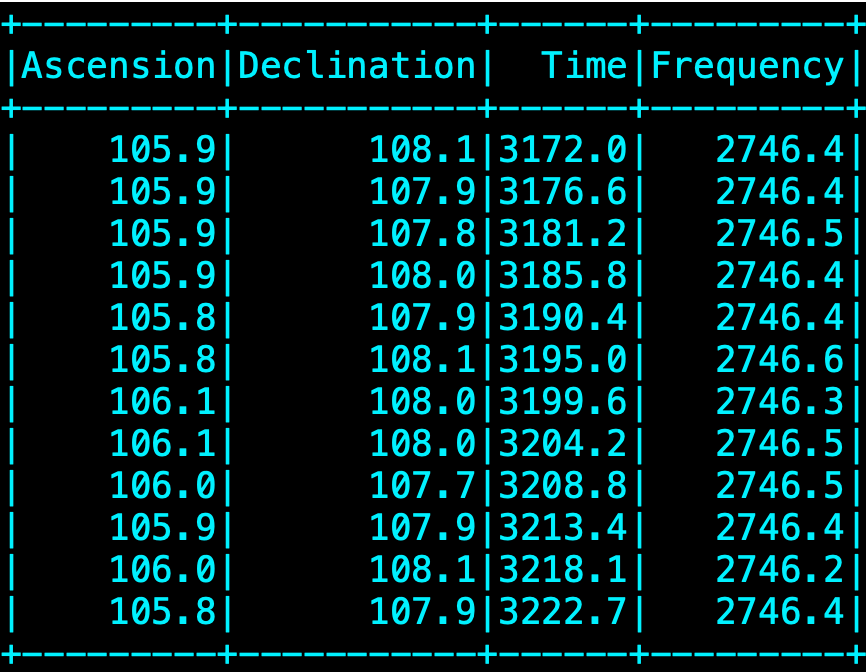

This is the most regular and temporarily repeating signal. All of the time intervals are 4.6 seconds. The Ascension values are within the range 105.8-106.1, and the Declination Values are within the range 107.8-108.1. The Frequency values are mostly around 2746.4. Not all of these values are within 0.1 of each other but this is expected because 0.1 is the standard deviation of the error, meaning that ~1/3 of the values will actually not be within that error bound. 